# SDS 4481 Final Presentation

* Nathan DeBenedictis

## In this Analysis we will be exploring the relationship between poor health and certain Physical and demographic factors.

We will be evaluating data that is collected at the county level.

The variables selected are related to the following questions:
 Question one
    Is poor health related to median household income?
 Question two
    Do certain factors have a larger affect depending on the income level of the county?
Question three
    What social determinants have the largest affect on poor health?

We will start by viewing summary statistics on relevant data for the aformentioned questions

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

county_data = pd.read_csv("final_project.csv", index_col='Row.Label')
state_health_summary = county_data.groupby('State.Abbreviation')['Poor.Health'].mean().reset_index()
state_health_summary = state_health_summary.rename(columns={'Poor.Health': 'Avg.Poor.Health'})

top_5_states = state_health_summary.sort_values(by='Avg.Poor.Health', ascending=False).head(5)
bottom_5_states = state_health_summary.sort_values(by='Avg.Poor.Health', ascending=True).head(5)

summary = pd.concat([top_5_states, bottom_5_states]).sort_values(by='Avg.Poor.Health', ascending=False)

In [392]:
print(summary)

   State.Abbreviation  Avg.Poor.Health
2                  AR         0.231626
1                  AL         0.229694
49                 WV         0.225047
25                 MS         0.223572
17                 KY         0.221119
23                 MN         0.123187
39                 RI         0.121780
41                 SD         0.119667
46                 VT         0.116242
6                  CT         0.113317


In [393]:
poor_health_summary = county_data['Poor.Health'].describe()
median_household_income_summary = county_data['Median.Household.Income'].describe()
print(poor_health_summary)
print(median_household_income_summary)

count    2715.000000
mean        0.174385
std         0.045176
min         0.082900
25%         0.140350
50%         0.167300
75%         0.203950
max         0.407300
Name: Poor.Health, dtype: float64
count      2715.000000
mean      51606.557274
std       13650.706994
min       25569.000000
25%       42680.000000
50%       49350.000000
75%       57274.500000
max      136191.000000
Name: Median.Household.Income, dtype: float64


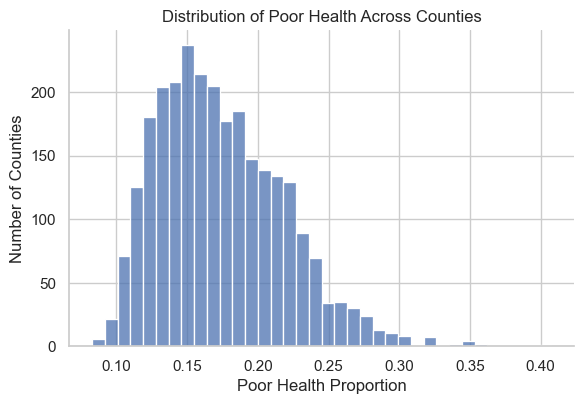

In [394]:
sns.displot(county_data['Poor.Health'], height=4, aspect=1.5)
plt.title('Distribution of Poor Health Across Counties')
plt.xlabel('Poor Health Proportion')
plt.ylabel('Number of Counties')
plt.show()

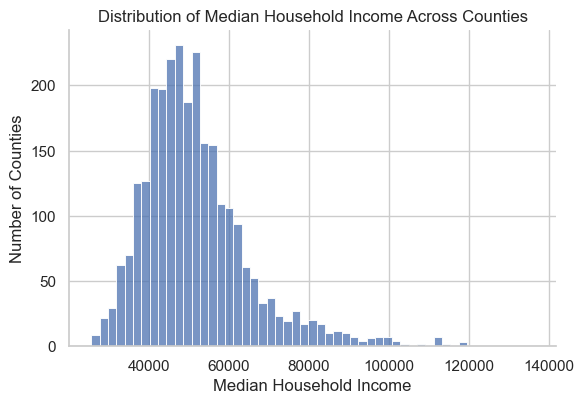

In [395]:
sns.displot(county_data['Median.Household.Income'], height=4, aspect=1.5)
plt.title('Distribution of Median Household Income Across Counties')
plt.xlabel('Median Household Income')
plt.ylabel('Number of Counties')
plt.show()

In [396]:
columns_of_interest = [
    'Poor.Health',
    'Uninsured',
    'Primary.Care.Physicians.Per.1000',
    'Mental.health.providers.Per.1000',
    'Adult.Obesity',
    'Proportion.of.Smokers',
    'High.School.Graduation',
    'Insufficient.Sleep',
    'Physical.Inactivity',
    'Excessive.Drinking',
    'Median.Household.Income',
    'Severe.Housing.Problems',
    'Unemployment',
    'Percent.Rural',
    'Over.65',
    'Percent.Females',
    'Population'
]
subset_data = county_data[columns_of_interest]

subset_data_numeric = subset_data.select_dtypes(include=['float64', 'int64'])

correlation_matrix = subset_data_numeric.corr()

## Variable inter-relation

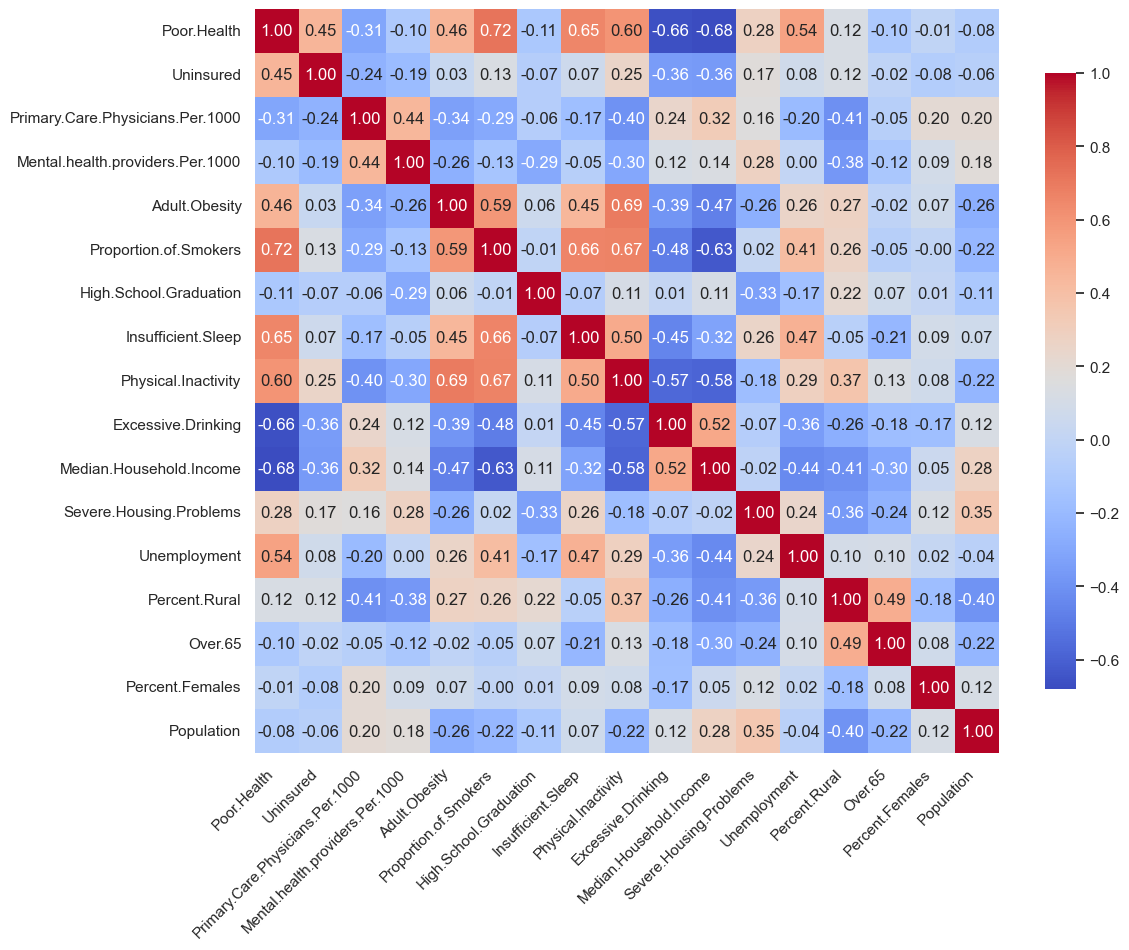

In [398]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": 0.8})
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

We see that the variables that relate most to poor health are proportion of smokers, median household income, excessive drinking, and insufficient sleep

Some interesting relations between X variables are:

Adulthood obesity and physical inactivity: .69

Proportion of smokers and physical inactivity: .67

Proportion of smokers and insufficient sleep: .66

Physical inactivity and excesive drinking: .57

These relationships are likely due to the fact that some of these variables can be affected by other variables. For example, physical inactivity leads to obesity and smoking can make it harder to fall asleep.


In [400]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

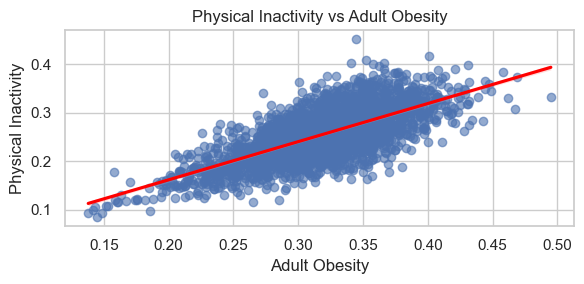

In [465]:
plt.figure(figsize=(6, 3))
sns.regplot(
    data=county_data,
    x='Adult.Obesity',
    y='Physical.Inactivity',
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'}
)
plt.title('Physical Inactivity vs Adult Obesity')
plt.xlabel('Adult Obesity')
plt.ylabel('Physical Inactivity')
plt.tight_layout()
plt.show()

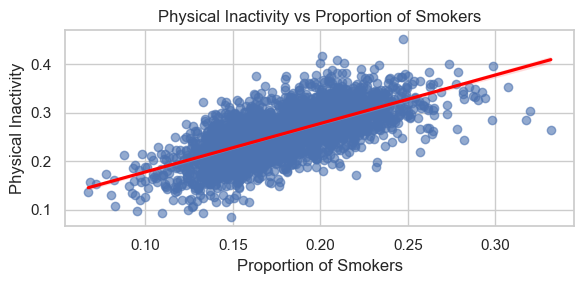

In [463]:
plt.figure(figsize=(6, 3))
sns.regplot(
    data=county_data,
    x='Proportion.of.Smokers',
    y='Physical.Inactivity',
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'}
)
plt.title('Physical Inactivity vs Proportion of Smokers')
plt.xlabel('Proportion of Smokers')
plt.ylabel('Physical Inactivity')
plt.tight_layout()
plt.show()

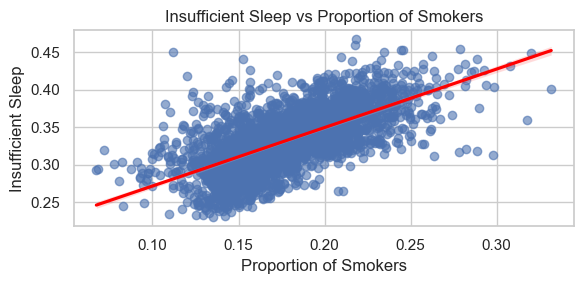

In [461]:
plt.figure(figsize=(6, 3))
sns.regplot(
    data=county_data,
    x='Proportion.of.Smokers',
    y='Insufficient.Sleep',
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'}
)
plt.title('Insufficient Sleep vs Proportion of Smokers')
plt.xlabel('Proportion of Smokers')
plt.ylabel('Insufficient Sleep')
plt.tight_layout()
plt.show()

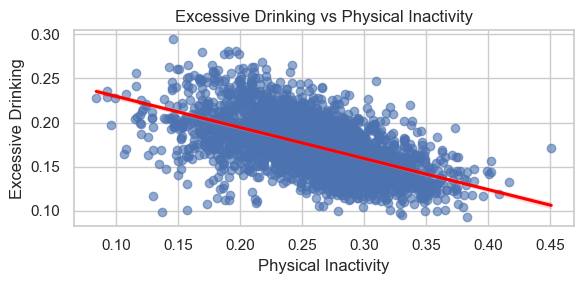

In [459]:
plt.figure(figsize=(6, 3))
sns.regplot(
    data=county_data,
    x='Physical.Inactivity',
    y='Excessive.Drinking',
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'}
)
plt.title('Excessive Drinking vs Physical Inactivity')
plt.xlabel('Physical Inactivity')
plt.ylabel('Excessive Drinking')
plt.tight_layout()
plt.show()

## Tree

In [406]:
predictors = [
    'Uninsured', 'Primary.Care.Physicians.Per.1000',
    'Mental.health.providers.Per.1000', 'Adult.Obesity',
    'Proportion.of.Smokers', 'High.School.Graduation',
    'Insufficient.Sleep', 'Physical.Inactivity',
    'Excessive.Drinking', 'Median.Household.Income',
    'Severe.Housing.Problems', 'Unemployment',
    'Percent.Rural', 'Over.65', 'Percent.Females',
    'Life.Expectancy', 'Population'
]

X = county_data[predictors]
y = county_data['Poor.Health']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Fit a simple Decision Tree
tree_model = DecisionTreeRegressor(max_leaf_nodes=8, random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=8, random_state=42)

In [407]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': tree_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Variable Importance Ranking:")
print(feature_importances)

Variable Importance Ranking:
                             Feature  Importance
9            Median.Household.Income    0.759266
15                   Life.Expectancy    0.139252
6                 Insufficient.Sleep    0.047369
0                          Uninsured    0.029338
4              Proportion.of.Smokers    0.024775
10           Severe.Housing.Problems    0.000000
14                   Percent.Females    0.000000
13                           Over.65    0.000000
12                     Percent.Rural    0.000000
11                      Unemployment    0.000000
8                 Excessive.Drinking    0.000000
1   Primary.Care.Physicians.Per.1000    0.000000
7                Physical.Inactivity    0.000000
5             High.School.Graduation    0.000000
3                      Adult.Obesity    0.000000
2   Mental.health.providers.Per.1000    0.000000
16                        Population    0.000000


In [408]:
X = county_data[predictors]
y = county_data['Poor.Health']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

better_tree_model = DecisionTreeRegressor(max_leaf_nodes=15, random_state=42)
better_tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=15, random_state=42)

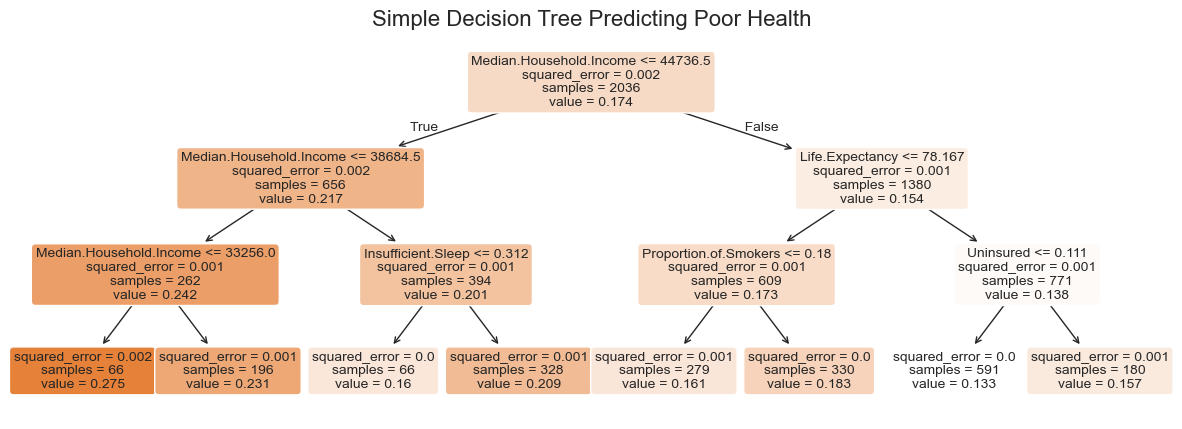

In [409]:
plt.figure(figsize=(15, 5))
plot_tree(
    tree_model,  
    feature_names=predictors,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title('Simple Decision Tree Predicting Poor Health', fontsize=16)
plt.show()
importances = pd.DataFrame({
    'Feature': predictors,
    'Importance': tree_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

In [410]:
print("Variable Importance")
print(importances)

Variable Importance
                             Feature  Importance
9            Median.Household.Income    0.759266
15                   Life.Expectancy    0.139252
6                 Insufficient.Sleep    0.047369
0                          Uninsured    0.029338
4              Proportion.of.Smokers    0.024775
10           Severe.Housing.Problems    0.000000
14                   Percent.Females    0.000000
13                           Over.65    0.000000
12                     Percent.Rural    0.000000
11                      Unemployment    0.000000
8                 Excessive.Drinking    0.000000
1   Primary.Care.Physicians.Per.1000    0.000000
7                Physical.Inactivity    0.000000
5             High.School.Graduation    0.000000
3                      Adult.Obesity    0.000000
2   Mental.health.providers.Per.1000    0.000000
16                        Population    0.000000


## Importance of Median Household Income

In [412]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = county_data[predictors]
y = county_data['Poor.Health']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

coef_df = pd.DataFrame({
    'Predictor': X.columns,
    'Coefficient': linreg.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

In [413]:
X = county_data[predictors]
y = county_data['Poor.Health']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

better_tree_model = DecisionTreeRegressor(max_leaf_nodes=15, random_state=42)
better_tree_model.fit(X_train, y_train)

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': better_tree_model.feature_importances_
}).sort_values(by='Importance', ascending=True)

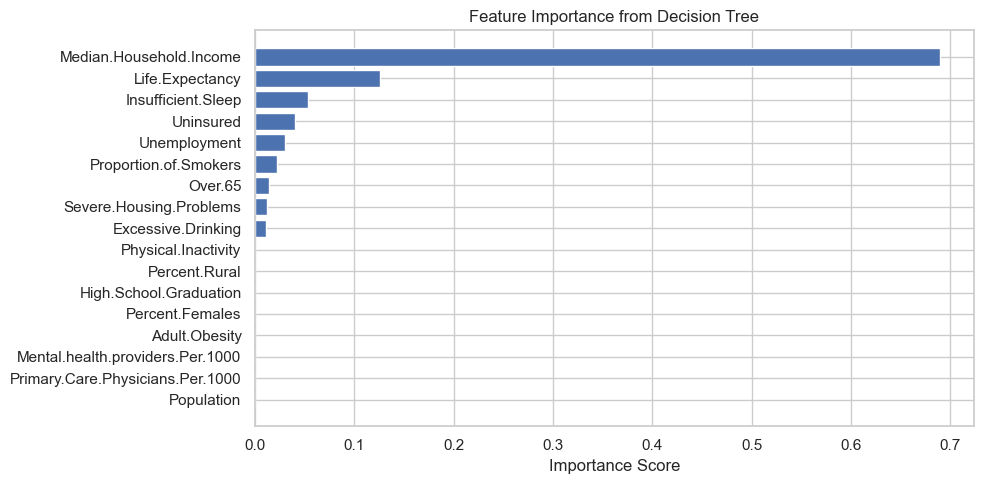

In [414]:
plt.figure(figsize=(10, 5))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance Score')
plt.title('Feature Importance from Decision Tree')
plt.tight_layout()
plt.show()

Median household income IS important in determining poor health rates

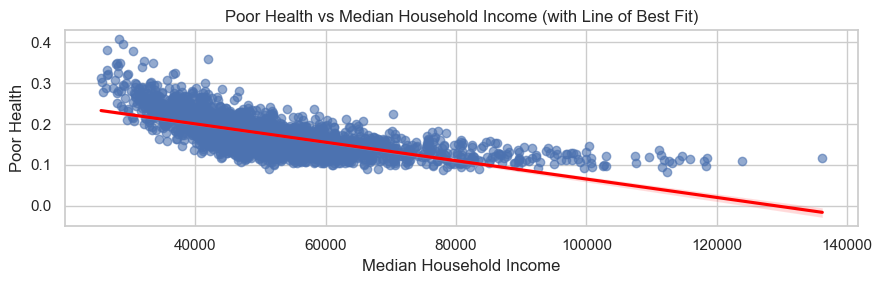

In [416]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
plt.figure(figsize=(9, 3))
sns.regplot(
    data=county_data,
    x='Median.Household.Income',
    y='Poor.Health',
    scatter_kws={'alpha': 0.6},  
    line_kws={'color': 'red'}    
)
plt.title('Poor Health vs Median Household Income (with Line of Best Fit)')
plt.xlabel('Median Household Income')
plt.ylabel('Poor Health')
plt.tight_layout()
plt.show()

In [417]:
correlation = county_data['Median.Household.Income'].corr(county_data['Poor.Health'])
print(f"Correlation between Median Household Income and Poor Health: {correlation:.4f}")

Correlation between Median Household Income and Poor Health: -0.6801


In [418]:
X = county_data[predictors]
y = county_data['Poor.Health']

median_income_split = county_data['Median.Household.Income'].median()
low_income_data = county_data[county_data['Median.Household.Income'] <= median_income_split]
high_income_data = county_data[county_data['Median.Household.Income'] > median_income_split]

X_low = low_income_data[predictors]
y_low = low_income_data['Poor.Health']

X_high = high_income_data[predictors]
y_high = high_income_data['Poor.Health']

low_model = LinearRegression().fit(X_low, y_low)
high_model = LinearRegression().fit(X_high, y_high)

coef_low = pd.DataFrame({
    'Predictor': X.columns,
    'Coefficient': low_model.coef_
}).copy()

coef_high = pd.DataFrame({
    'Predictor': X.columns,
    'Coefficient': high_model.coef_
}).copy()

coef_low = coef_low.reindex(coef_low['Coefficient'].abs().sort_values(ascending=False).index)
coef_high = coef_high.reindex(coef_high['Coefficient'].abs().sort_values(ascending=False).index)

## Differences in high and low income communities

In [420]:
print("=== Low Income Counties ===")
print(coef_low)

=== Low Income Counties ===
                           Predictor   Coefficient
8                 Excessive.Drinking -4.174748e-01
11                      Unemployment  2.871722e-01
4              Proportion.of.Smokers  2.566836e-01
13                           Over.65 -1.805126e-01
0                          Uninsured  1.585999e-01
6                 Insufficient.Sleep  1.453958e-01
10           Severe.Housing.Problems  1.116581e-01
14                   Percent.Females -9.524325e-02
7                Physical.Inactivity  3.398929e-02
12                     Percent.Rural -1.803789e-02
5             High.School.Graduation  1.759121e-02
3                      Adult.Obesity  1.743485e-02
1   Primary.Care.Physicians.Per.1000 -9.124121e-03
15                   Life.Expectancy  1.487387e-03
2   Mental.health.providers.Per.1000  2.079039e-05
9            Median.Household.Income -2.820219e-06
16                        Population -1.222159e-09


From the data we can observe that excessive drinking, unemployment, and proportion of smokers are the 3 most impactful variables in determining poor health for lower half income counties. Excessive drinking is by far the most impactful.

In [422]:
print("\n=== High Income Counties ===")
print(coef_high)


=== High Income Counties ===
                           Predictor   Coefficient
11                      Unemployment  3.456624e-01
4              Proportion.of.Smokers  1.994734e-01
0                          Uninsured  1.657225e-01
8                 Excessive.Drinking -1.521095e-01
10           Severe.Housing.Problems  1.333924e-01
6                 Insufficient.Sleep  1.214355e-01
13                           Over.65 -1.034022e-01
14                   Percent.Females -9.984943e-02
7                Physical.Inactivity  7.648134e-02
3                      Adult.Obesity  2.090563e-02
12                     Percent.Rural -1.100892e-02
5             High.School.Graduation  5.732835e-03
1   Primary.Care.Physicians.Per.1000 -9.753326e-04
2   Mental.health.providers.Per.1000 -7.524817e-04
15                   Life.Expectancy -6.047935e-04
9            Median.Household.Income -5.250335e-07
16                        Population  1.051237e-09


From the data we can observe that unemployment, proportion of smokers, and uninsured are the most important factors in determining poor health rates in upper half income counties. Unemployment is by far the most impactful.

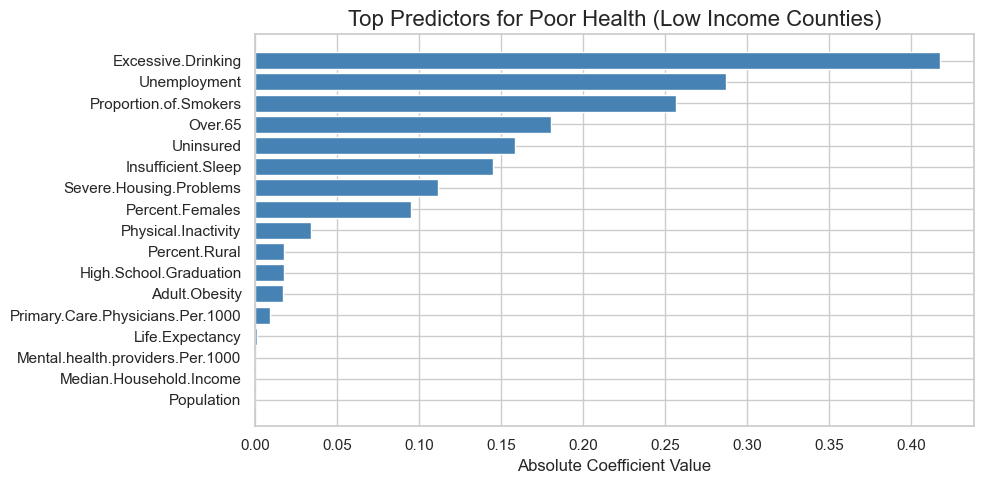

In [424]:
coef_low['Abs_Coefficient'] = coef_low['Coefficient'].abs()
coef_low = coef_low.sort_values(by='Abs_Coefficient', ascending=False)
plt.figure(figsize=(10, 5))
plt.barh(coef_low['Predictor'], coef_low['Abs_Coefficient'], color='steelblue')
plt.title('Top Predictors for Poor Health (Low Income Counties)', fontsize=16)
plt.gca().invert_yaxis() 
plt.xlabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()

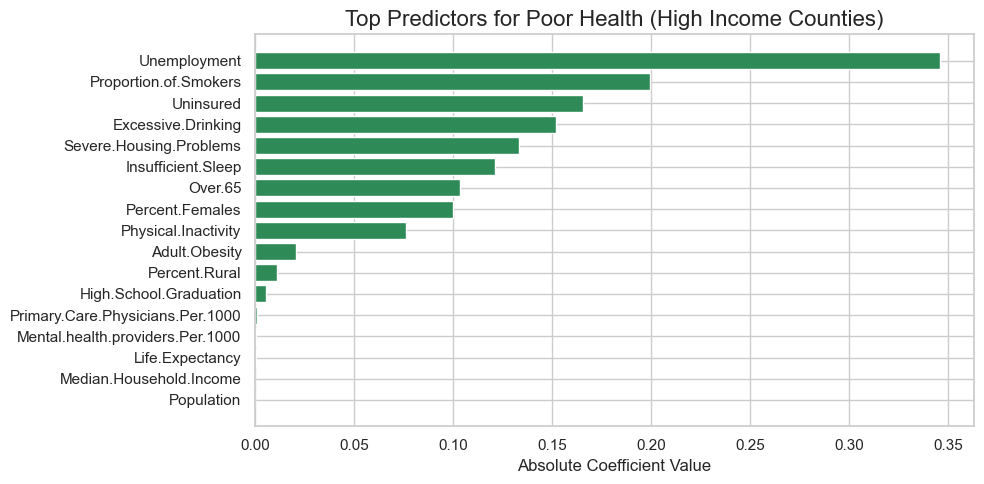

In [425]:
coef_high['Abs_Coefficient'] = coef_high['Coefficient'].abs()
coef_high = coef_high.sort_values(by='Abs_Coefficient', ascending=False)
plt.figure(figsize=(10, 5))
plt.barh(coef_high['Predictor'], coef_high['Abs_Coefficient'], color='seagreen')
plt.title('Top Predictors for Poor Health (High Income Counties)', fontsize=16)
plt.gca().invert_yaxis() 
plt.xlabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()

In [426]:
selected_predictors = [
    'Adult.Obesity',
    'Proportion.of.Smokers',
    'High.School.Graduation',
    'Insufficient.Sleep',
    'Physical.Inactivity',
    'Excessive.Drinking'
]

X = county_data[selected_predictors]
y = county_data['Poor.Health']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

simple_model = LinearRegression()
simple_model.fit(X_train, y_train)

y_pred = simple_model.predict(X_test)

coef_table = pd.DataFrame({
    'Predictor': X.columns,
    'Coefficient': simple_model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

r2 = r2_score(y_test, y_pred)

## Social Determinants of Health

In [427]:
print("=== Regression Coefficients ===")
print(coef_table)
print(f"\n=== Model R² Score: {r2:.4f} ===")

=== Regression Coefficients ===
                Predictor  Coefficient
1   Proportion.of.Smokers     0.512147
5      Excessive.Drinking    -0.497266
3      Insufficient.Sleep     0.240518
4     Physical.Inactivity     0.067663
2  High.School.Graduation    -0.060908
0           Adult.Obesity    -0.057816

=== Model R² Score: 0.6800 ===


Rsquared is signifigant

# Conclusions

* Question 1 conclusion
* Median Household income plays a large role in determining health. It is the most impactful factor in relation to poor health. This is probably due to how being poor vs rich affects all aspects of life, all the time.
* Question 2 conclusion
* There definitely are factors that matter more on each half of median household income. Unemployment matters much more on the richer side. Economic insecurity can overwhelm health conciousness even in these areas. Additionally, Excessive Drinking mattered more in the poorer areas. This shows that alcoholics are more likely to be in a much worse health state in poorer communities.
* Question 3 conclusion
* Yes, Social Determinants of Health-Behavioral do have a signifigant impact on poor health. They account for 68% of the variance. Smoking, drinking, and lack of sleep are the most impactful

## Suggestions for further research

1. Gathering data on a smaller scale:

   Getting data by township instead of by county would be even more accurate and help to further show the relationships between
   these variables.
   
3. See how these numbers have changed overtime

    By observing how these variables have shifted, we can also cpmpare them to health statistics to see which variables improve or
    decline health the most as they change.